## Time to get your hands dirty: The HR diagram   (...and the importance of data scaling in machine learning)

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by [Deepraj Baidya](https://github.com/deepraj1729) and was originally published on [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?

In [1]:
# > LECTURE 15: Hertzsprung-Russell diagram

# 240 stars described by the following information:
# Temperature (in Kelvin)
# Luminosity (L/Lo)
# Radius (R/Ro)
# Absolute magnitude (Mv) -> apparent magnitude that a star would have if it were 10 parsecs from Earth
# Color (Red/Orange/Yellow/White/Blue)
# Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
# Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3D PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv") # DataFrame pandas
print (df_stars)

# Check if there's NaN values -> False 
print(df_stars.isna().any().any()) 


     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

       Star type Star color Spectral Cl

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


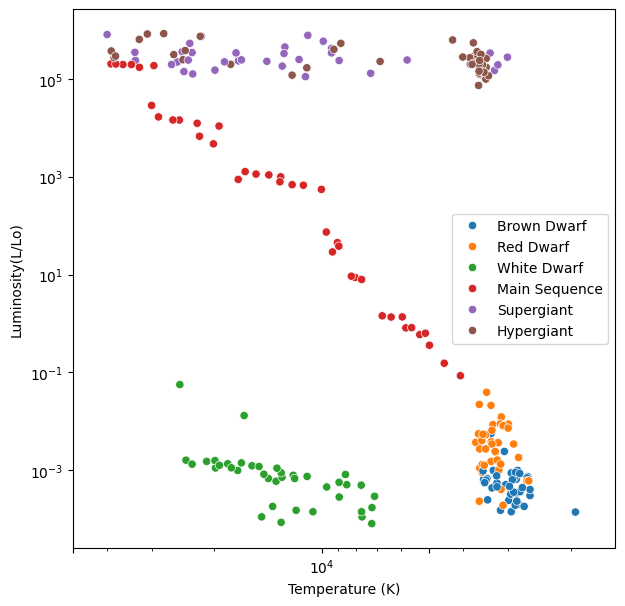

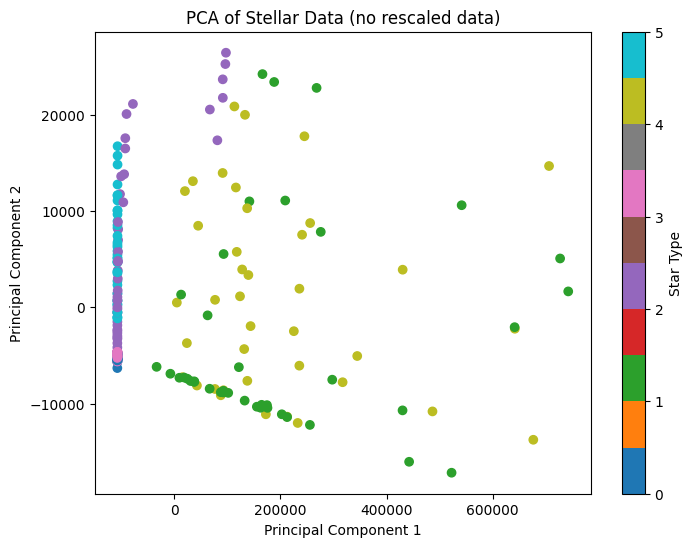

In [ ]:
le = LabelEncoder()

# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)
plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

# Use only columns with numbers
data = df_stars.iloc[:, :-3]

# PCA (data not rescaled) -> describes better the data projecting them onto new axis, linear combination of original variables
pca = PCA(n_components=2)  # data projection on two dimensions 
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_stars['Star type'], cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Stellar Data (no rescaled data)')
plt.colorbar(label='Star Type')
plt.show() 

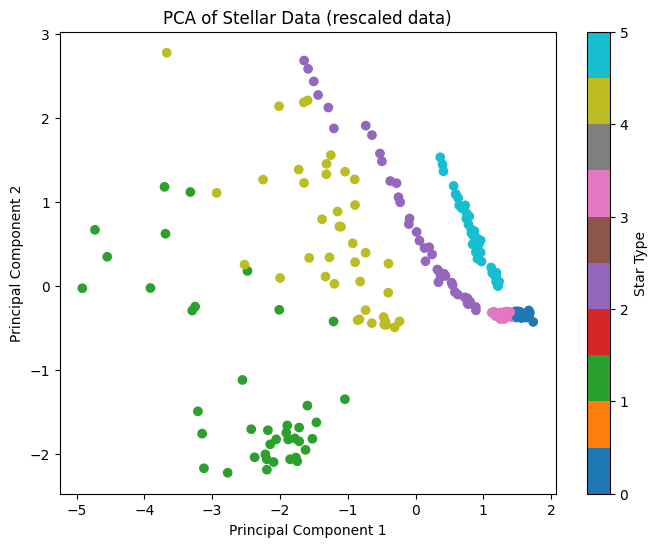


2 Principal Components PCA
Variance explained by PC1: 60.36%
Variance explained by PC2: 23.50%
Total variance explained: 83.86%



In [5]:
# PCA is sensitive to the scales of the variables, as it depends on variance (greater values have greater variance so PCA gives it a greater importance)
# > The data is better to be rescaled so that: mean = 0 and standard deviation = 1
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(data)

pca = PCA(n_components=2) 
data_pca = pca.fit_transform(data_rescaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_stars['Star type'], cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Stellar Data (rescaled data)')
plt.colorbar(label='Star Type')
plt.show()

# How much variance is explained by those two components
explained_var = pca.explained_variance_ratio_
print()
print("2 Principal Components PCA")
print(f"Variance explained by PC1: {explained_var[0]:.2%}") # PC1 explains the largest possible amount of variance
print(f"Variance explained by PC2: {explained_var[1]:.2%}") # PC2 explains the largest remaining amount of variance orthogonal to PC1
print(f"Total variance explained: {explained_var.sum():.2%}") # dataset's total variability is obtained in 2D
print()

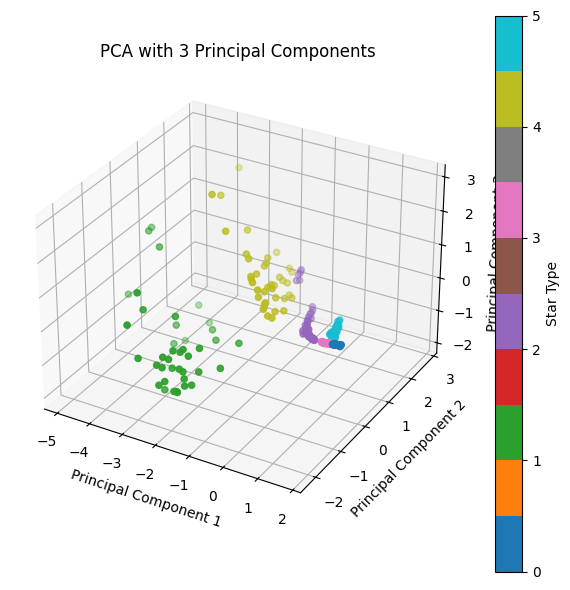

3 Principal Components PCA
Variance explained by PC1: 60.36%
Variance explained by PC2: 23.50%
Variance explained by PC3: 9.33%
Total variance explained: 93.19%



In [6]:
# 3D PCA
pca = PCA(n_components=3) 
data_pca = pca.fit_transform(data_rescaled)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')  

scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],  c=df_stars['Star type'], cmap='tab10')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3') 
plt.title("PCA with 3 Principal Components")
plt.colorbar(scatter, label='Star Type')
plt.tight_layout()
plt.show()

explained_var = pca.explained_variance_ratio_
print("3 Principal Components PCA")
print(f"Variance explained by PC1: {explained_var[0]:.2%}")
print(f"Variance explained by PC2: {explained_var[1]:.2%}")
print(f"Variance explained by PC3: {explained_var[2]:.2%}") 
print(f"Total variance explained: {explained_var.sum():.2%}") 
print()

